In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x : "%.2f" % x)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## WADi Datasets

In [12]:
wadi = pd.read_csv('/Users/denizbeyazgul/Documents/VISTA/WADI Datasets/WADI_attackdataLABLE.csv')
w = wadi.copy()
w.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130
0,Row,Date,Time,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,1_MV_004_STATUS,1_P_001_STATUS,1_P_002_STATUS,1_P_003_STATUS,1_P_004_STATUS,1_P_005_STATUS,1_P_006_STATUS,2_DPIT_001_PV,2_FIC_101_CO,2_FIC_101_PV,2_FIC_101_SP,2_FIC_201_CO,2_FIC_201_PV,2_FIC_201_SP,2_FIC_301_CO,2_FIC_301_PV,2_FIC_301_SP,2_FIC_401_CO,2_FIC_401_PV,2_FIC_401_SP,2_FIC_501_CO,2_FIC_501_PV,2_FIC_501_SP,2_FIC_601_CO,2_FIC_601_PV,2_FIC_601_SP,2_FIT_001_PV,2_FIT_002_PV,2_FIT_003_PV,2_FQ_101_PV,2_FQ_201_PV,2_FQ_301_PV,2_FQ_401_PV,2_FQ_501_PV,2_FQ_601_PV,2_LS_001_AL,2_LS_002_AL,2_LS_101_AH,2_LS_101_AL,2_LS_201_AH,2_LS_201_AL,2_LS_301_AH,2_LS_301_AL,2_LS_401_AH,2_LS_401_AL,2_LS_501_AH,2_LS_501_AL,2_LS_601_AH,2_LS_601_AL,2_LT_001_PV,2_LT_002_PV,2_MCV_007_CO,2_MCV_101_CO,2_MCV_201_CO,2_MCV_301_CO,2_MCV_401_CO,2_MCV_501_CO,2_MCV_601_CO,2_MV_001_STATUS,2_MV_002_STATUS,2_MV_003_STATUS,2_MV_004_STATUS,2_MV_005_STATUS,2_MV_006_STATUS,2_MV_009_STATUS,2_MV_101_STATUS,2_MV_201_STATUS,2_MV_301_STATUS,2_MV_401_STATUS,2_MV_501_STATUS,2_MV_601_STATUS,2_P_001_STATUS,2_P_002_STATUS,2_P_003_SPEED,2_P_003_STATUS,2_P_004_SPEED,2_P_004_STATUS,2_PIC_003_CO,2_PIC_003_PV,2_PIC_003_SP,2_PIT_001_PV,2_PIT_002_PV,2_PIT_003_PV,2_SV_101_STATUS,2_SV_201_STATUS,2_SV_301_STATUS,2_SV_401_STATUS,2_SV_501_STATUS,2_SV_601_STATUS,2A_AIT_001_PV,2A_AIT_002_PV,2A_AIT_003_PV,2A_AIT_004_PV,2B_AIT_001_PV,2B_AIT_002_PV,2B_AIT_003_PV,2B_AIT_004_PV,3_AIT_001_PV,3_AIT_002_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LS_001_AL,3_LT_001_PV,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,"Attack LABLE (1:No Attack, -1:Attack)"
1,1,10/9/17,00:00.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,0,48.482,1,1,1,1,1,1,1,1,1,1,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100,0.0465504,0.1,20.0701,0.175445,0.09,100,0.0487998,0.11,100,0.0511665,0.15,0,0.61969,0,0.239192,0.310242,0.0465504,0.170598,0.0487998,0.0511665,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,69.8595,78.5906,0,0,0,20.0685,0,68.6983,35.6947,1,1,1,2,2,1,2,1,1,2,1,2,2,NaN,NaN,-0.0161573,1,0.0295743,1,50,0.0250713,1,152.437,89.5817,0.0250713,1,1,1,1,1,1,0.168945,7.81E-41,8.6875,473.89,0.188477,8.96011,8.69146,475.488,0,8279.1,11.528,-65.9686,0.755703,0.626306,1,64.3306,1,1,1,1,1,1,1,62.6226,1,0.39,1
2,2,10/9/17,00:01.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,0,48.482,1,1,1,1,1,1,1,1,1,1,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100,0.0465504,0.1,20.0701,0.175445,0.09,100,0.0487998,0.11,100,0.0511665,0.15,0,0.61969,0,0.239192,0.310242,0.0465504,0.170598,0.0487998,0.0511665,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,69.8595,78.5906,0,0,0,20.0685,0,68.6983,35.6947,1,1,1,2,2,1,2,1,1,2,1,2,2,NaN,NaN,-0.0161573,1,0.0295743,1,50,0.0250713,1,152.437,89.5817,0.0250713,1,1,1,1,1,1,0.168945,7.81E-41,8.6875,473.89,0.188477,8.96011,8.69146,475.488,0,8279.1,11.528,-65.9686,0.755703,0.626306,1,64.3306,1,1,1,1,1,1,1,62.6226,1,0.39,1
3,3,10/9/17,00:02.0,164.21,0.529486,11.9972,482.48,0.331167,0.00127323,0,0,48.482,1,1,1,1,1,1,1,1,1,1,2538.7,35.6659,0.240392,0.2,68.5648,0.306246,0.1,100,0.0465504,0.1,20.0701,0.175445,0.09,100,0.0487998,0.11,100,0.0511665,0.15,0,0.61969,0,0.239192,0.310242,0.0465504,0.170598,0.0487998,0.0511665,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,69.8595,78.5906,0,0,0,20.0685,0,68.6983,35.6947,1,1,1,2,2,1,2,1,1,2,1,2,2,NaN,NaN,-0.0161573,1,0.0295743,1,50,0.0250713,1,152.437,89.5817,0.0250713,1,1,1,

### Pre-processing of WADi Dataset

In [14]:
w.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '121', '122', '123', '124', '125', '126', '127', '128', '129', '130'],
      dtype='object', length=131)

#### Adjusting column names

In [16]:
column_names = w.iloc[0]
w.columns = column_names

In [17]:
# Drop the first row since it's now used as the header

w = w[1:].reset_index(drop=True)

In [18]:
# renaming the target variable

# Rename a single column
w.rename(columns = {'Attack LABLE (1:No Attack, -1:Attack)': 'Attack_Label'}, inplace=True)


In [19]:
w.isnull().sum()

0
Row                              2
Date                             2
Time                             2
1_AIT_001_PV                     2
1_AIT_002_PV                     2
1_AIT_003_PV                     2
1_AIT_004_PV                     2
1_AIT_005_PV                     2
1_FIT_001_PV                     2
1_LS_001_AL                      2
1_LS_002_AL                      2
1_LT_001_PV                      2
1_MV_001_STATUS                  2
1_MV_002_STATUS                  2
1_MV_003_STATUS                  2
1_MV_004_STATUS                  2
1_P_001_STATUS                   2
1_P_002_STATUS                   2
1_P_003_STATUS                   2
1_P_004_STATUS                   2
1_P_005_STATUS                   2
1_P_006_STATUS                   2
2_DPIT_001_PV                    2
2_FIC_101_CO                     2
2_FIC_101_PV                     2
2_FIC_101_SP                     2
2_FIC_201_CO                     2
2_FIC_201_PV                     2
2_FIC_201_SP      

In [20]:
w["Attack_Label"].value_counts()

Attack_Label
1     158731
-1      9977
1       4095
Name: count, dtype: int64

In [21]:
#### Removing irrelevant and empty columns

w.drop(["Row ", "Date ", "Time", "2_LS_001_AL", "2_LS_002_AL", "2_P_001_STATUS", "2_P_002_STATUS", ], axis=1, inplace=True)

In [22]:
w.shape

(172803, 124)

In [23]:
# Removing the duplicate records

w = w.drop_duplicates()
w.duplicated().sum()

0

In [24]:
w.shape

(45491, 124)

In [25]:
w.reset_index(drop=True, inplace=True)

In [26]:
# Dropping null values

w.dropna(inplace=True)

In [27]:
w.shape

(45490, 124)

In [28]:
w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45490 entries, 0 to 45489
Columns: 124 entries, 1_AIT_001_PV to Attack_Label
dtypes: object(124)
memory usage: 43.4+ MB


In [29]:
# Convert all features from Object to Int

w = w.apply(pd.to_numeric, errors='coerce')

In [30]:
w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45490 entries, 0 to 45489
Columns: 124 entries, 1_AIT_001_PV to Attack_Label
dtypes: float64(123), int64(1)
memory usage: 43.4 MB


In [31]:
w.head(10)

,1_AIT_001_PV,1_AIT_002_PV,1_AIT_003_PV,1_AIT_004_PV,1_AIT_005_PV,1_FIT_001_PV,1_LS_001_AL,1_LS_002_AL,1_LT_001_PV,1_MV_001_STATUS,1_MV_002_STATUS,1_MV_003_STATUS,1_MV_004_STATUS,1_P_001_STATUS,1_P_002_STATUS,1_P_003_STATUS,1_P_004_STATUS,1_P_005_STATUS,1_P_006_STATUS,2_DPIT_001_PV,2_FIC_101_CO,2_FIC_101_PV,2_FIC_101_SP,2_FIC_201_CO,2_FIC_201_PV,2_FIC_201_SP,2_FIC_301_CO,2_FIC_301_PV,2_FIC_301_SP,2_FIC_401_CO,2_FIC_401_PV,2_FIC_401_SP,2_FIC_501_CO,2_FIC_501_PV,2_FIC_501_SP,2_FIC_601_CO,2_FIC_601_PV,2_FIC_601_SP,2_FIT_001_PV,2_FIT_002_PV,2_FIT_003_PV,2_FQ_101_PV,2_FQ_201_PV,2_FQ_301_PV,2_FQ_401_PV,2_FQ_501_PV,2_FQ_601_PV,2_LS_101_AH,2_LS_101_AL,2_LS_201_AH,2_LS_201_AL,2_LS_301_AH,2_LS_301_AL,2_LS_401_AH,2_LS_401_AL,2_LS_501_AH,2_LS_501_AL,2_LS_601_AH,2_LS_601_AL,2_LT_001_PV,2_LT_002_PV,2_MCV_007_CO,2_MCV_101_CO,2_MCV_201_CO,2_MCV_301_CO,2_MCV_401_CO,2_MCV_501_CO,2_MCV_601_CO,2_MV_001_STATUS,2_MV_002_STATUS,2_MV_003_STATUS,2_MV_004_STATUS,2_MV_005_STATUS,2_MV_006_STATUS,2_MV_009_STATUS,2_MV_101_STATUS,2_MV_201_STATUS,2_MV_301_STATUS,2_MV_401_STATUS,2_MV_501_STATUS,2_MV_601_STATUS,2_P_003_SPEED,2_P_003_STATUS,2_P_004_SPEED,2_P_004_STATUS,2_PIC_003_CO,2_PIC_003_PV,2_PIC_003_SP,2_PIT_001_PV,2_PIT_002_PV,2_PIT_003_PV,2_SV_101_STATUS,2_SV_201_STATUS,2_SV_301_STATUS,2_SV_401_STATUS,2_SV_501_STATUS,2_SV_601_STATUS,2A_AIT_001_PV,2A_AIT_002_PV,2A_AIT_003_PV,2A_AIT_004_PV,2B_AIT_001_PV,2B_AIT_002_PV,2B_AIT_003_PV,2B_AIT_004_PV,3_AIT_001_PV,3_AIT_002_PV,3_AIT_003_PV,3_AIT_004_PV,3_AIT_005_PV,3_FIT_001_PV,3_LS_001_AL,3_LT_001_PV,3_MV_001_STATUS,3_MV_002_STATUS,3_MV_003_STATUS,3_P_001_STATUS,3_P_002_STATUS,3_P_003_STATUS,3_P_004_STATUS,LEAK_DIFF_PRESSURE,PLANT_START_STOP_LOG,TOTAL_CONS_REQUIRED_FLOW,Attack_Label
0,164.21,0.53,12.00,482.48,0.33,0.00,0.00,0.00,48.48,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2538.70,35.67,0.24,0.20,68.56,0.31,0.10,100.00,0.05,0.10,20.07,0.18,0.09,100.00,0.05,0.11,100.00,0.05,0.15,0.00,0.62,0.00,0.24,0.31,0.05,0.17,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69.86,78.59,0.00,0.00,0.00,20.07,0.00,68.70,35.69,1.00,1.00,1.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,2.00,-0.02,1.00,0.03,1.00,50.00,0.03,1.00,152.44,89.58,0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.17,0.00,8.69,473.89,0.19,8.96,8.69,475.49,0.00,8279.10,11.53,-65.97,0.76,0.63,1.00,64.33,1.00,1.00,1.00,1.00,1.00,1.00,1.00,62.62,1.00,0.39,1
1,164.21,0.53,12.00,482.48,0.33,0.00,0.00,0.00,48.48,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2538.70,35.67,0.24,0.20,68.56,0.31,0.10,100.00,0.05,0.10,20.07,0.18,0.09,100.00,0.05,0.11,100.00,0.05,0.15,0.00,0.62,0.00,0.24,0.31,0.05,0.17,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69.86,78.59,0.00,0.00,0.00,20.07,0.00,68.70,35.69,1.00,1.00,1.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,2.00,-0.02,1.00,0.03,1.00,50.00,0.03,1.00,152.44,89.58,0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.17,0.00,8.69,473.83,0.19,9.02,8.73,475.39,0.00,8279.10,11.53,-65.97,0.76,0.63,1.00,64.33,1.00,1.00,1.00,1.00,1.00,1.00,1.00,62.62,1.00,0.39,1
2,164.21,0.55,11.99,482.47,0.33,0.00,0.00,0.00,48.40,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2539.39,35.35,0.24,0.20,66.67,0.31,0.10,100.00,0.05,0.10,19.51,0.16,0.09,100.00,0.05,0.11,100.00,0.05,0.15,0.00,0.61,0.00,0.24,0.31,0.05,0.17,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69.87,78.90,0.00,0.00,0.00,19.52,0.00,66.81,35.38,1.00,1.00,1.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00,2.00,2.00,-0.02,1.00,0.03,1.00,50.00,0.03,1.00,152.37,89.76,0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.17,0.00,8.69,473.83,0.19,9.02,8.73,475.39,0.00,8279.10,0.00,1286.83,0.76,0.62,1.00,64.39,1.00,1.00,1.00,1.00,1.00,1.00,1.00,62.62,1.00,0.39,1
3,164.21,0.56,12.00,482.48,0.33,0.00,0.00,0.00,48.49,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2535.00,34.98,0.24,0.20,64.78,0.31,0.10,100.00,0.05,0.10,18.83,0.16,0.09,100.00,0.05,0.11,100.00,0.05,0.15,0.00,0.61,0.00,0.24,0.31,0.05,0.16,0.05,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [32]:
# Identifying and Removing the Constant Features

constant_features = [col for col in w.columns if w[col].nunique() == 1]

print("Constant Features:", constant_features)


Constant Features: ['1_LS_001_AL', '1_LS_002_AL', '1_P_002_STATUS', '1_P_004_STATUS', '2_MV_001_STATUS', '2_MV_002_STATUS', '2_MV_004_STATUS', '2_MV_005_STATUS', '2_MV_009_STATUS', '2_P_004_STATUS', '2_SV_101_STATUS', '2_SV_201_STATUS', '2_SV_301_STATUS', '2_SV_401_STATUS', '2_SV_501_STATUS', '2_SV_601_STATUS', '3_AIT_001_PV', '3_AIT_002_PV', '3_LS_001_AL', '3_MV_001_STATUS', '3_MV_002_STATUS', '3_MV_003_STATUS', '3_P_001_STATUS', '3_P_002_STATUS', '3_P_003_STATUS', '3_P_004_STATUS', 'PLANT_START_STOP_LOG']


In [33]:
w = w.drop(columns = constant_features)

In [34]:
w.shape

(45490, 97)

### Correlation between Independent Variables

In [36]:
# Calculating the correlation matrix for independent variables

independent_vars = w.drop(columns=['Attack_Label']) # Dropping dependent variable
corr_matrix = independent_vars.corr()

# Displaying the correlation matrix
print(corr_matrix)

0                         1_AIT_001_PV  1_AIT_002_PV  1_AIT_003_PV  \
0                                                                    
1_AIT_001_PV                      1.00          0.00          0.09   
1_AIT_002_PV                      0.00          1.00          0.04   
1_AIT_003_PV                      0.09          0.04          1.00   
1_AIT_004_PV                     -0.05          0.02          0.21   
1_AIT_005_PV                     -0.07         -0.01         -0.09   
1_FIT_001_PV                      0.11          0.08          0.11   
1_LT_001_PV                      -0.02         -0.11         -0.01   
1_MV_001_STATUS                   0.11          0.08          0.11   
1_MV_002_STATUS                   0.40          0.21          0.05   
1_MV_003_STATUS                   0.40          0.21          0.05   
1_MV_004_STATUS                  -0.05         -0.05          0.00   
1_P_001_STATUS                    0.11          0.08          0.11   
1_P_003_STATUS      

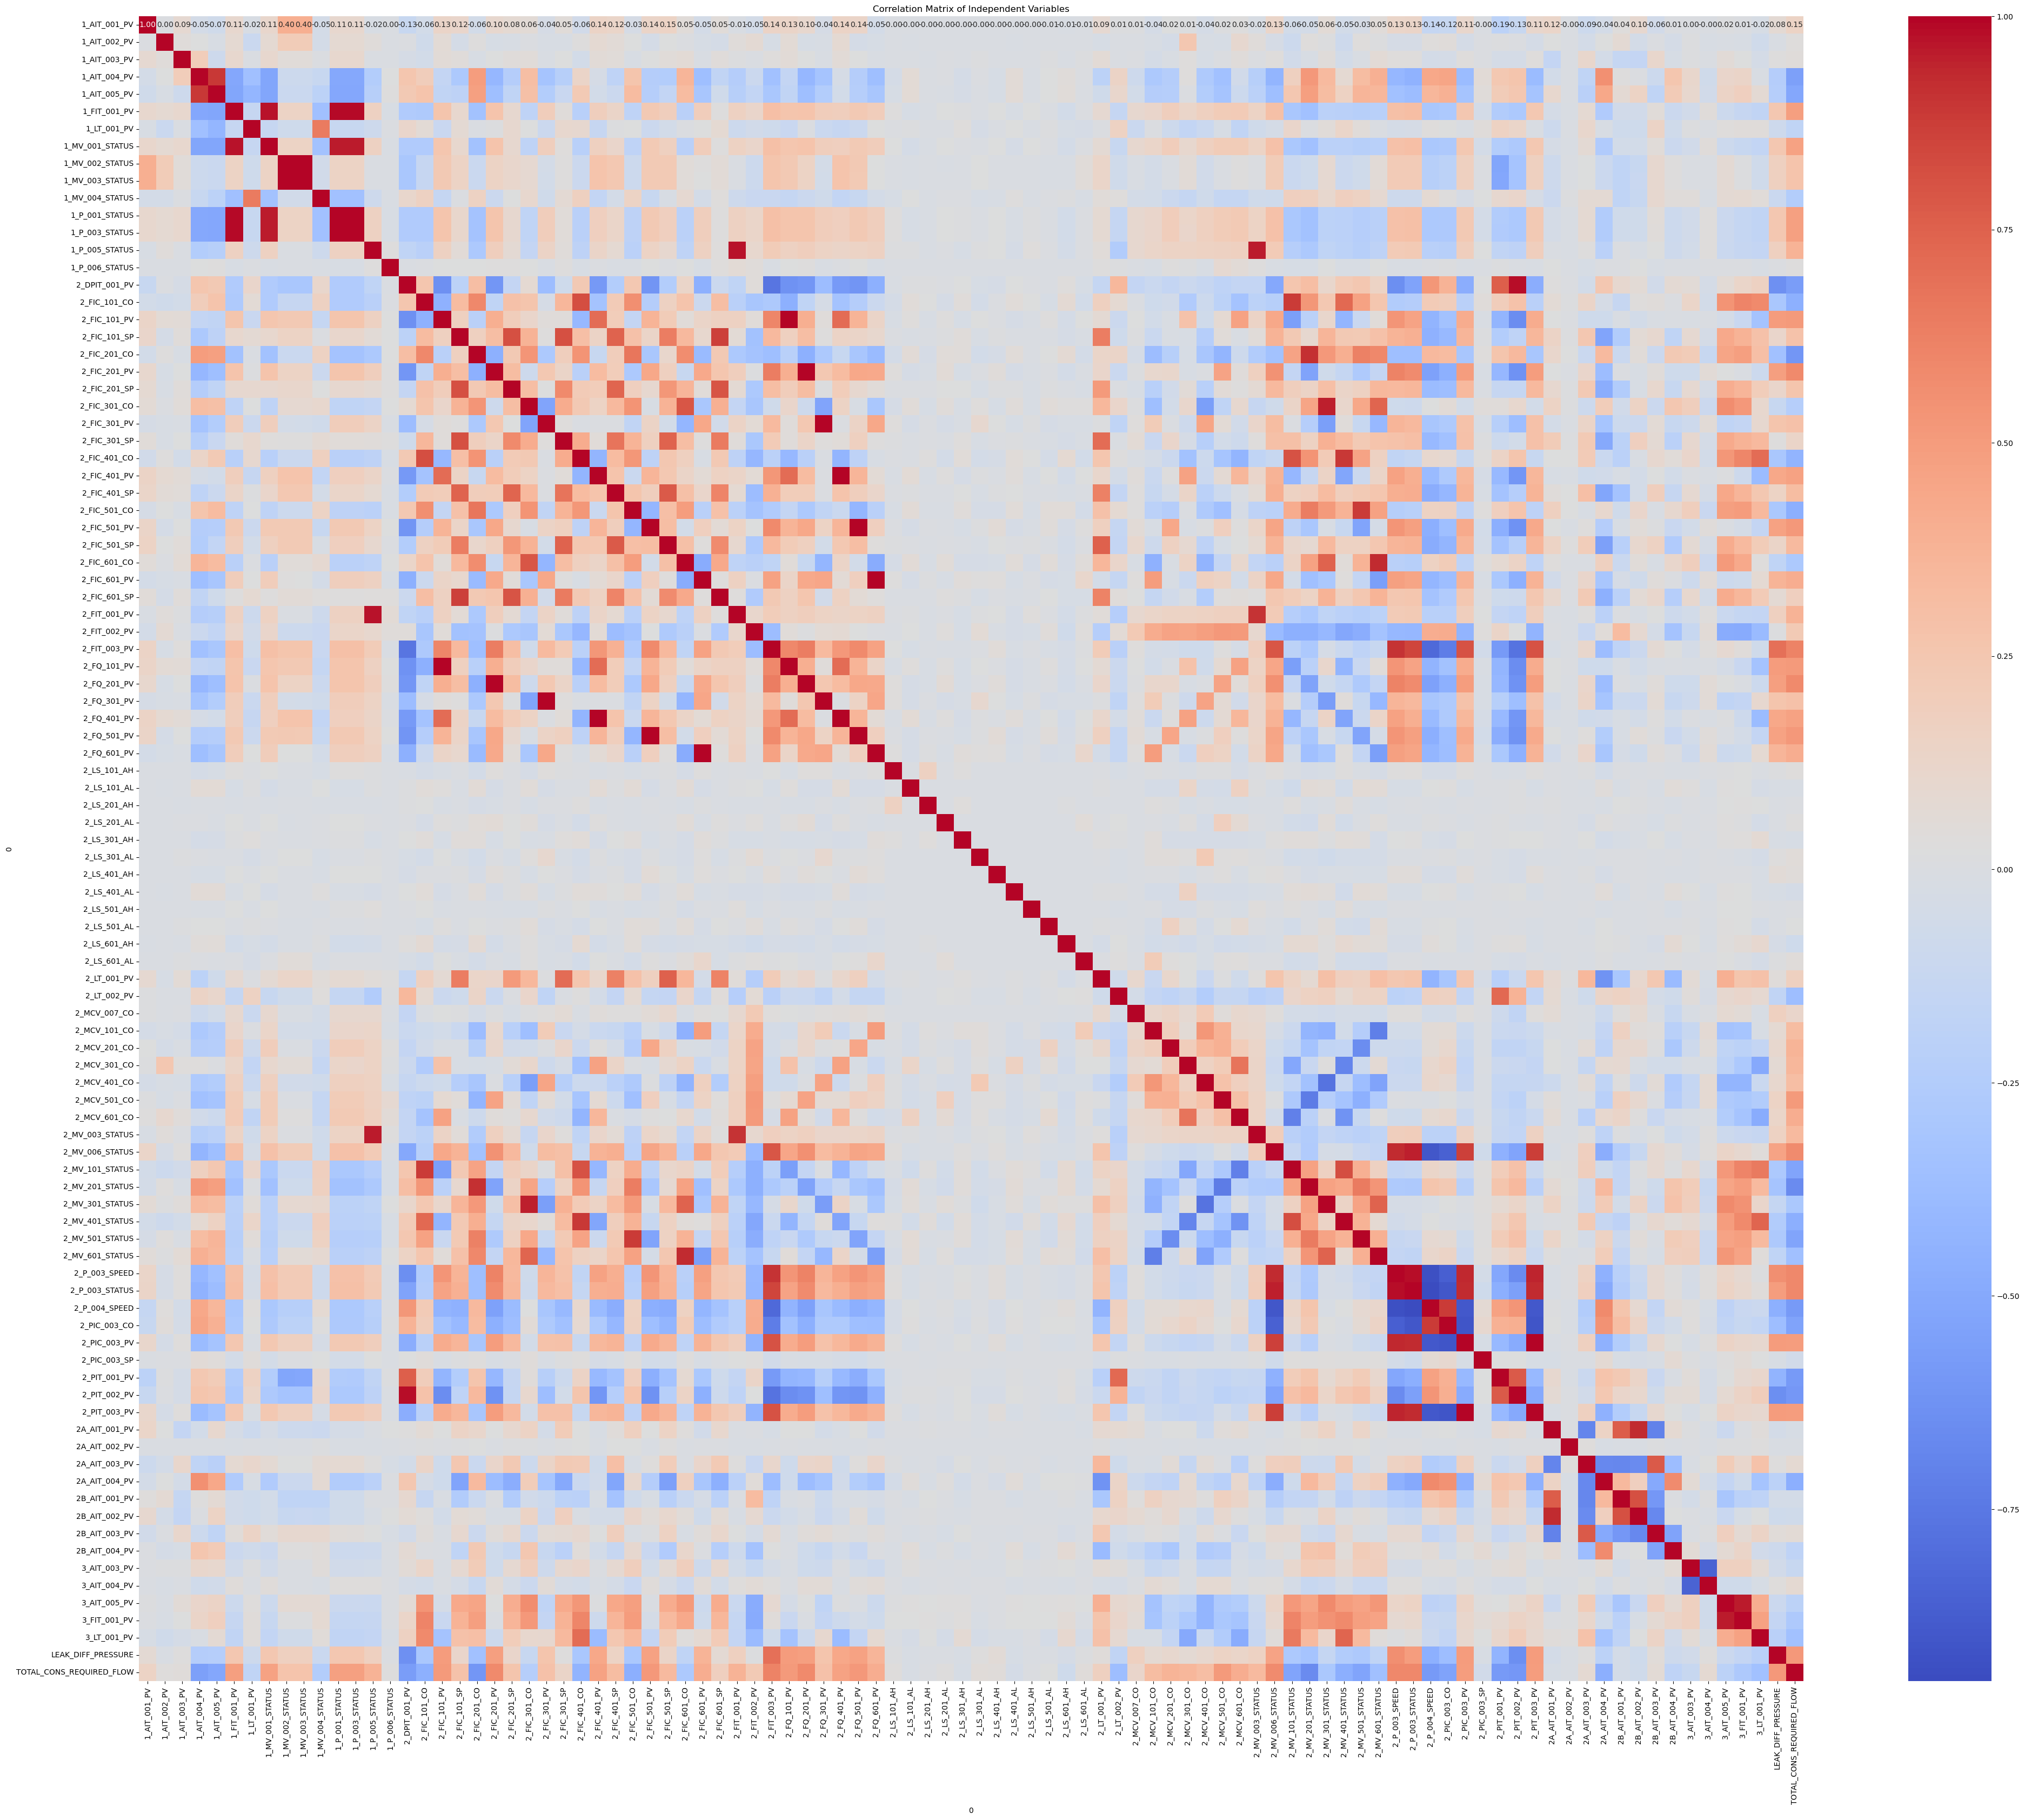

In [37]:
# Visualizing the correlation matrix
plt.figure(figsize=(50, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

In [38]:
# Get the correlation matrix
corr_matrix = independent_vars.corr().abs() 

# Mask the diagonal and lower triangle (since it's symmetric and diagonal is always 1)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index pairs where correlation > 0.90
high_corr_pairs = [(col1, col2, upper_triangle.loc[col1, col2]) 
                   for col1 in upper_triangle.columns 
                   for col2 in upper_triangle.columns 
                   if upper_triangle.loc[col1, col2] > 0.90]

# Display the results
print("Highly correlated variable pairs (correlation > 0.90):")
for var1, var2, corr_value in high_corr_pairs:
    print(f"{var1} and {var2} -> Correlation: {corr_value:.2f}")


Highly correlated variable pairs (correlation > 0.90):
1_FIT_001_PV and 1_MV_001_STATUS -> Correlation: 0.97
1_FIT_001_PV and 1_P_001_STATUS -> Correlation: 0.99
1_FIT_001_PV and 1_P_003_STATUS -> Correlation: 0.99
1_MV_001_STATUS and 1_P_001_STATUS -> Correlation: 0.96
1_MV_001_STATUS and 1_P_003_STATUS -> Correlation: 0.96
1_MV_002_STATUS and 1_MV_003_STATUS -> Correlation: 1.00
1_P_001_STATUS and 1_P_003_STATUS -> Correlation: 1.00
1_P_005_STATUS and 2_FIT_001_PV -> Correlation: 0.97
1_P_005_STATUS and 2_MV_003_STATUS -> Correlation: 0.96
2_DPIT_001_PV and 2_PIT_002_PV -> Correlation: 0.98
2_FIC_101_PV and 2_FQ_101_PV -> Correlation: 1.00
2_FIC_201_CO and 2_MV_201_STATUS -> Correlation: 0.91
2_FIC_201_PV and 2_FQ_201_PV -> Correlation: 1.00
2_FIC_301_CO and 2_MV_301_STATUS -> Correlation: 0.95
2_FIC_301_PV and 2_FQ_301_PV -> Correlation: 1.00
2_FIC_401_PV and 2_FQ_401_PV -> Correlation: 1.00
2_FIC_501_PV and 2_FQ_501_PV -> Correlation: 1.00
2_FIC_601_CO and 2_MV_601_STATUS -> Correl

In [39]:
corr_matrix = independent_vars.corr()

# Mask the diagonal and lower triangle
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index pairs where correlation > 0.90 or < -0.90
high_corr_pairs = [(col1, col2, upper_triangle.loc[col1, col2]) 
                   for col1 in upper_triangle.columns 
                   for col2 in upper_triangle.columns 
                   if upper_triangle.loc[col1, col2] > 0.90 or upper_triangle.loc[col1, col2] < -0.90]

# Display the results
print("Highly correlated variable pairs (correlation > 0.90 or < -0.90):")
for var1, var2, corr_value in high_corr_pairs:
    print(f"{var1} and {var2} -> Correlation: {corr_value:.2f}")

Highly correlated variable pairs (correlation > 0.90 or < -0.90):
1_FIT_001_PV and 1_MV_001_STATUS -> Correlation: 0.97
1_FIT_001_PV and 1_P_001_STATUS -> Correlation: 0.99
1_FIT_001_PV and 1_P_003_STATUS -> Correlation: 0.99
1_MV_001_STATUS and 1_P_001_STATUS -> Correlation: 0.96
1_MV_001_STATUS and 1_P_003_STATUS -> Correlation: 0.96
1_MV_002_STATUS and 1_MV_003_STATUS -> Correlation: 1.00
1_P_001_STATUS and 1_P_003_STATUS -> Correlation: 1.00
1_P_005_STATUS and 2_FIT_001_PV -> Correlation: 0.97
1_P_005_STATUS and 2_MV_003_STATUS -> Correlation: 0.96
2_DPIT_001_PV and 2_PIT_002_PV -> Correlation: 0.98
2_FIC_101_PV and 2_FQ_101_PV -> Correlation: 1.00
2_FIC_201_CO and 2_MV_201_STATUS -> Correlation: 0.91
2_FIC_201_PV and 2_FQ_201_PV -> Correlation: 1.00
2_FIC_301_CO and 2_MV_301_STATUS -> Correlation: 0.95
2_FIC_301_PV and 2_FQ_301_PV -> Correlation: 1.00
2_FIC_401_PV and 2_FQ_401_PV -> Correlation: 1.00
2_FIC_501_PV and 2_FQ_501_PV -> Correlation: 1.00
2_FIC_601_CO and 2_MV_601_STATU

### Correlation of independent variables with dependent variable

0
Attack_Label                1.00
2_PIT_001_PV                0.38
2_PIT_002_PV                0.26
2_DPIT_001_PV               0.25
2_P_004_SPEED               0.24
1_LT_001_PV                 0.20
2_PIC_003_CO                0.20
2_MV_101_STATUS             0.19
2_LT_002_PV                 0.18
2_MV_401_STATUS             0.17
2B_AIT_001_PV               0.17
2A_AIT_004_PV               0.16
2_FIC_101_CO                0.15
2_FIC_401_CO                0.11
1_MV_004_STATUS             0.10
3_LT_001_PV                 0.09
2B_AIT_002_PV               0.09
2B_AIT_004_PV               0.09
2A_AIT_001_PV               0.09
1_AIT_005_PV                0.08
2_MV_201_STATUS             0.07
1_AIT_004_PV                0.07
3_FIT_001_PV                0.07
2_FIC_201_CO                0.06
2_MV_501_STATUS             0.05
2_FIC_501_CO                0.03
2_LS_601_AH                 0.02
2_FQ_601_PV                 0.02
2_FIC_601_PV                0.02
2_LS_501_AL                 0.02
2_LS_301

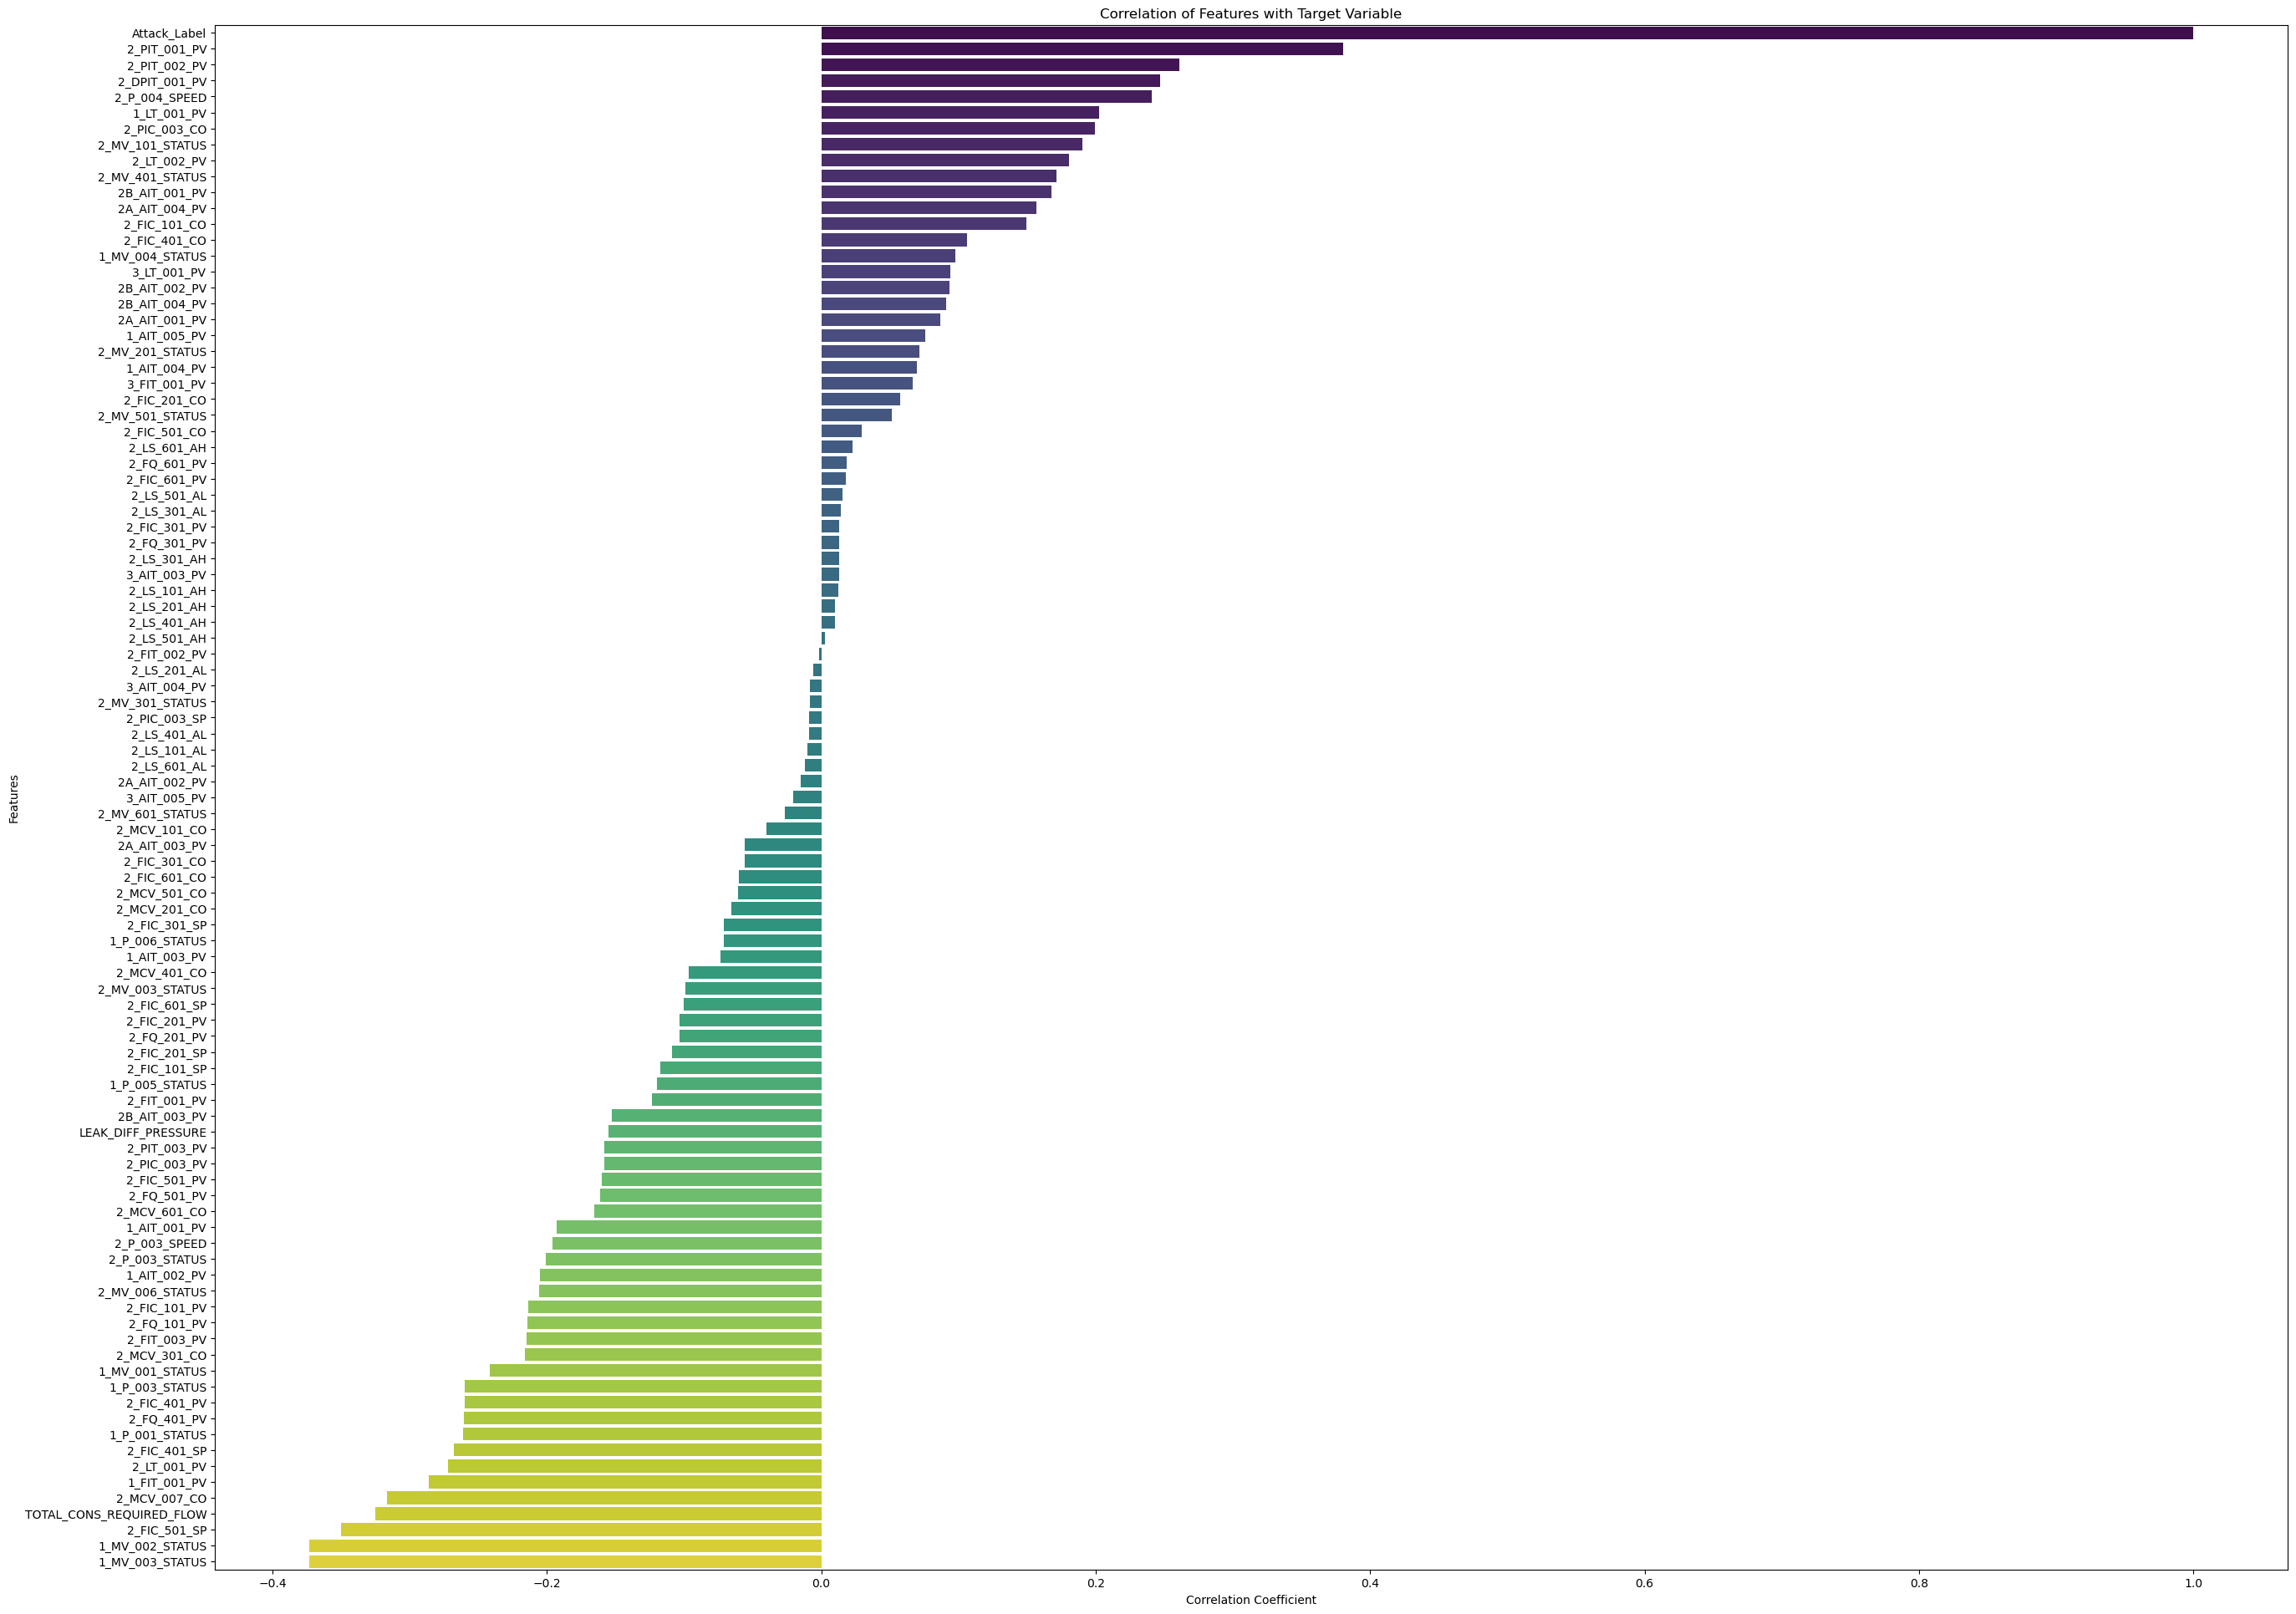

In [41]:
# Calculate correlation of all variables with dependent variable
correlation_with_target = w.corr()['Attack_Label'].sort_values(ascending=False)

print(correlation_with_target)

# Optionally visualize
plt.figure(figsize=(32, 24))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [42]:
# Removing the Features that has the 1.00 correlation

# 1_MV_002_STATUS and 1_MV_003_STATUS -> Correlation: 1.00 -- Correlation with target varaible is the same (-0.37)
# 1_P_001_STATUS and 1_P_003_STATUS -> Correlation: 1.00 -- Correlation with target varaible is the same (-0.26)
# 2_FIC_101_PV and 2_FQ_101_PV -> Correlation: 1.00 -- Correlation with target varaible is the same (-0.21)
# 2_FIC_301_PV and 2_FQ_301_PV -> Correlation: 1.00 -- Correlation with target varaible is the same (0.01)
# 2_FIC_401_PV and 2_FQ_401_PV -> Correlation: 1.00 -- Correlation with target varaible is the same (-0.26)
# 2_FIC_501_PV and 2_FQ_501_PV -> Correlation: 1.00 -- Correlation with target varaible is the same (-0.16)
# 2_FIC_601_PV and 2_FQ_601_PV -> Correlation: 1.00 -- Correlation with target varaible is the same (0.02)
# 2_PIC_003_PV and 2_PIT_003_PV -> Correlation: 1.00 -- Correlation with target varaible is the same (-0.16)


high_correlated_columns = ["1_MV_003_STATUS", "1_P_003_STATUS", "2_FQ_101_PV", "2_FQ_301_PV", "2_FQ_401_PV", "2_FQ_501_PV", "2_FQ_601_PV", "2_PIT_003_PV" ]

w = w.drop(columns = high_correlated_columns)

In [43]:
w.shape

(45490, 89)

In [44]:
w["Attack_Label"].value_counts()

Attack_Label
 1    42371
-1     3119
Name: count, dtype: int64

In [45]:
# Changing the values of Attack_Label

# Raw version:  (1:No Attack, -1:Attack)
# Pre-processed: 0: No Attack, 1:Attack


w["Attack_Label"] = w["Attack_Label"].replace({1:0, -1:1})

In [46]:
w["Attack_Label"].value_counts()

Attack_Label
0    42371
1     3119
Name: count, dtype: int64

In [47]:
w.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
1_AIT_001_PV,45490.00,176.75,24.26,0.00,170.88,177.22,179.53,634.49
1_AIT_002_PV,45490.00,0.65,0.35,0.00,0.59,0.63,0.66,6.00
1_AIT_003_PV,45490.00,11.93,0.13,0.00,11.91,11.93,11.95,12.11
1_AIT_004_PV,45490.00,453.77,18.77,0.00,440.79,454.94,468.22,484.87
1_AIT_005_PV,45490.00,0.27,0.04,0.20,0.24,0.27,0.31,0.35
1_FIT_001_PV,45490.00,0.56,0.87,0.00,0.00,0.00,1.88,2.50
1_LT_001_PV,45490.00,55.45,8.72,37.00,47.79,55.81,62.46,75.22
1_MV_001_STATUS,45490.00,1.28,0.46,0.00,1.00,1.00,2.00,2.00
1_MV_002_STATUS,45490.00,1.01,0.12,0.00,1.00,1.00,1.00,2.00


### Training the Model

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [84]:
# Seperating Target Variables

X = w.drop("Attack_Label", axis=1)
y = w["Attack_Label"]

# Splitting datasets into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Train Random Forest Classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [89]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10, 15, 20, 30, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', 0.5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search.fit(X, y)

print(grid_search.best_params_)


In [91]:
rf_tuned = RandomForestClassifier( n_estimators=100,
                                max_depth = 10, 
                                max_features = 0.5, 
                                min_samples_leaf = 1, 
                                min_samples_split = 5,
                                class_weight='balanced'
                                  )

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=0.5,
                       min_samples_split=5)

In [93]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9899978017146626

In [84]:
from sklearn.model_selection import train_test_split, cross_validate
eval_results = cross_validate(
    rf_tuned, X, y, cv=20, scoring='balanced_accuracy', return_train_score=True, n_jobs=-1
)
test_scores = eval_results['test_score']
train_scores = eval_results['train_score']
(test_scores.mean(), test_scores.std()), (train_scores.mean(), train_scores.std())

((0.8174364162338715, 0.11196445244195244),
 (0.9950822813751813, 0.001353207450138174))

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9998    0.9895    0.9946      8467
           1     0.8760    0.9968    0.9325       631

    accuracy                         0.9900      9098
   macro avg     0.9379    0.9932    0.9636      9098
weighted avg     0.9912    0.9900    0.9903      9098



In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[8378   89]
 [   2  629]]


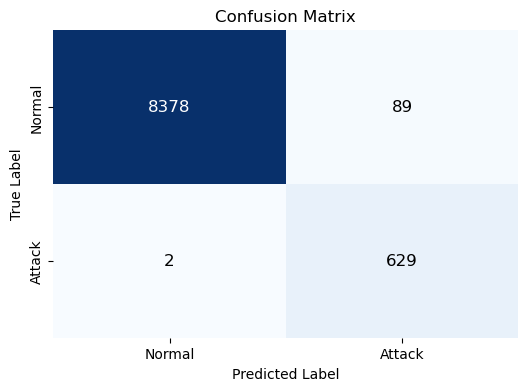

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap without annotations
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    cm,
    cmap='Blues',
    xticklabels=['Normal', 'Attack'],
    yticklabels=['Normal', 'Attack'],
    cbar=False
)

# Add labels and title
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.title('Confusion Matrix', color='black')
plt.xticks(color='black')
plt.yticks(color='black')

# Manually annotate with dynamic text color
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        value = cm[i, j]
        # Get background color from the heatmap
        color = ax.collections[0].get_cmap()(ax.collections[0].norm(value))
        # Calculate brightness
        brightness = (color[0] * 299 + color[1] * 587 + color[2] * 114) / 1000
        text_color = 'black' if brightness > 0.5 else 'white'
        ax.text(j + 0.5, i + 0.5, f'{value}', ha='center', va='center', color=text_color, fontsize=12)

plt.show()


## Feature Importance

In [101]:
Importance = pd.DataFrame({"Importance" : rf_tuned.feature_importances_*100},
                           index = X_train.columns)

Text(0.5, 0, 'Feature Importance')

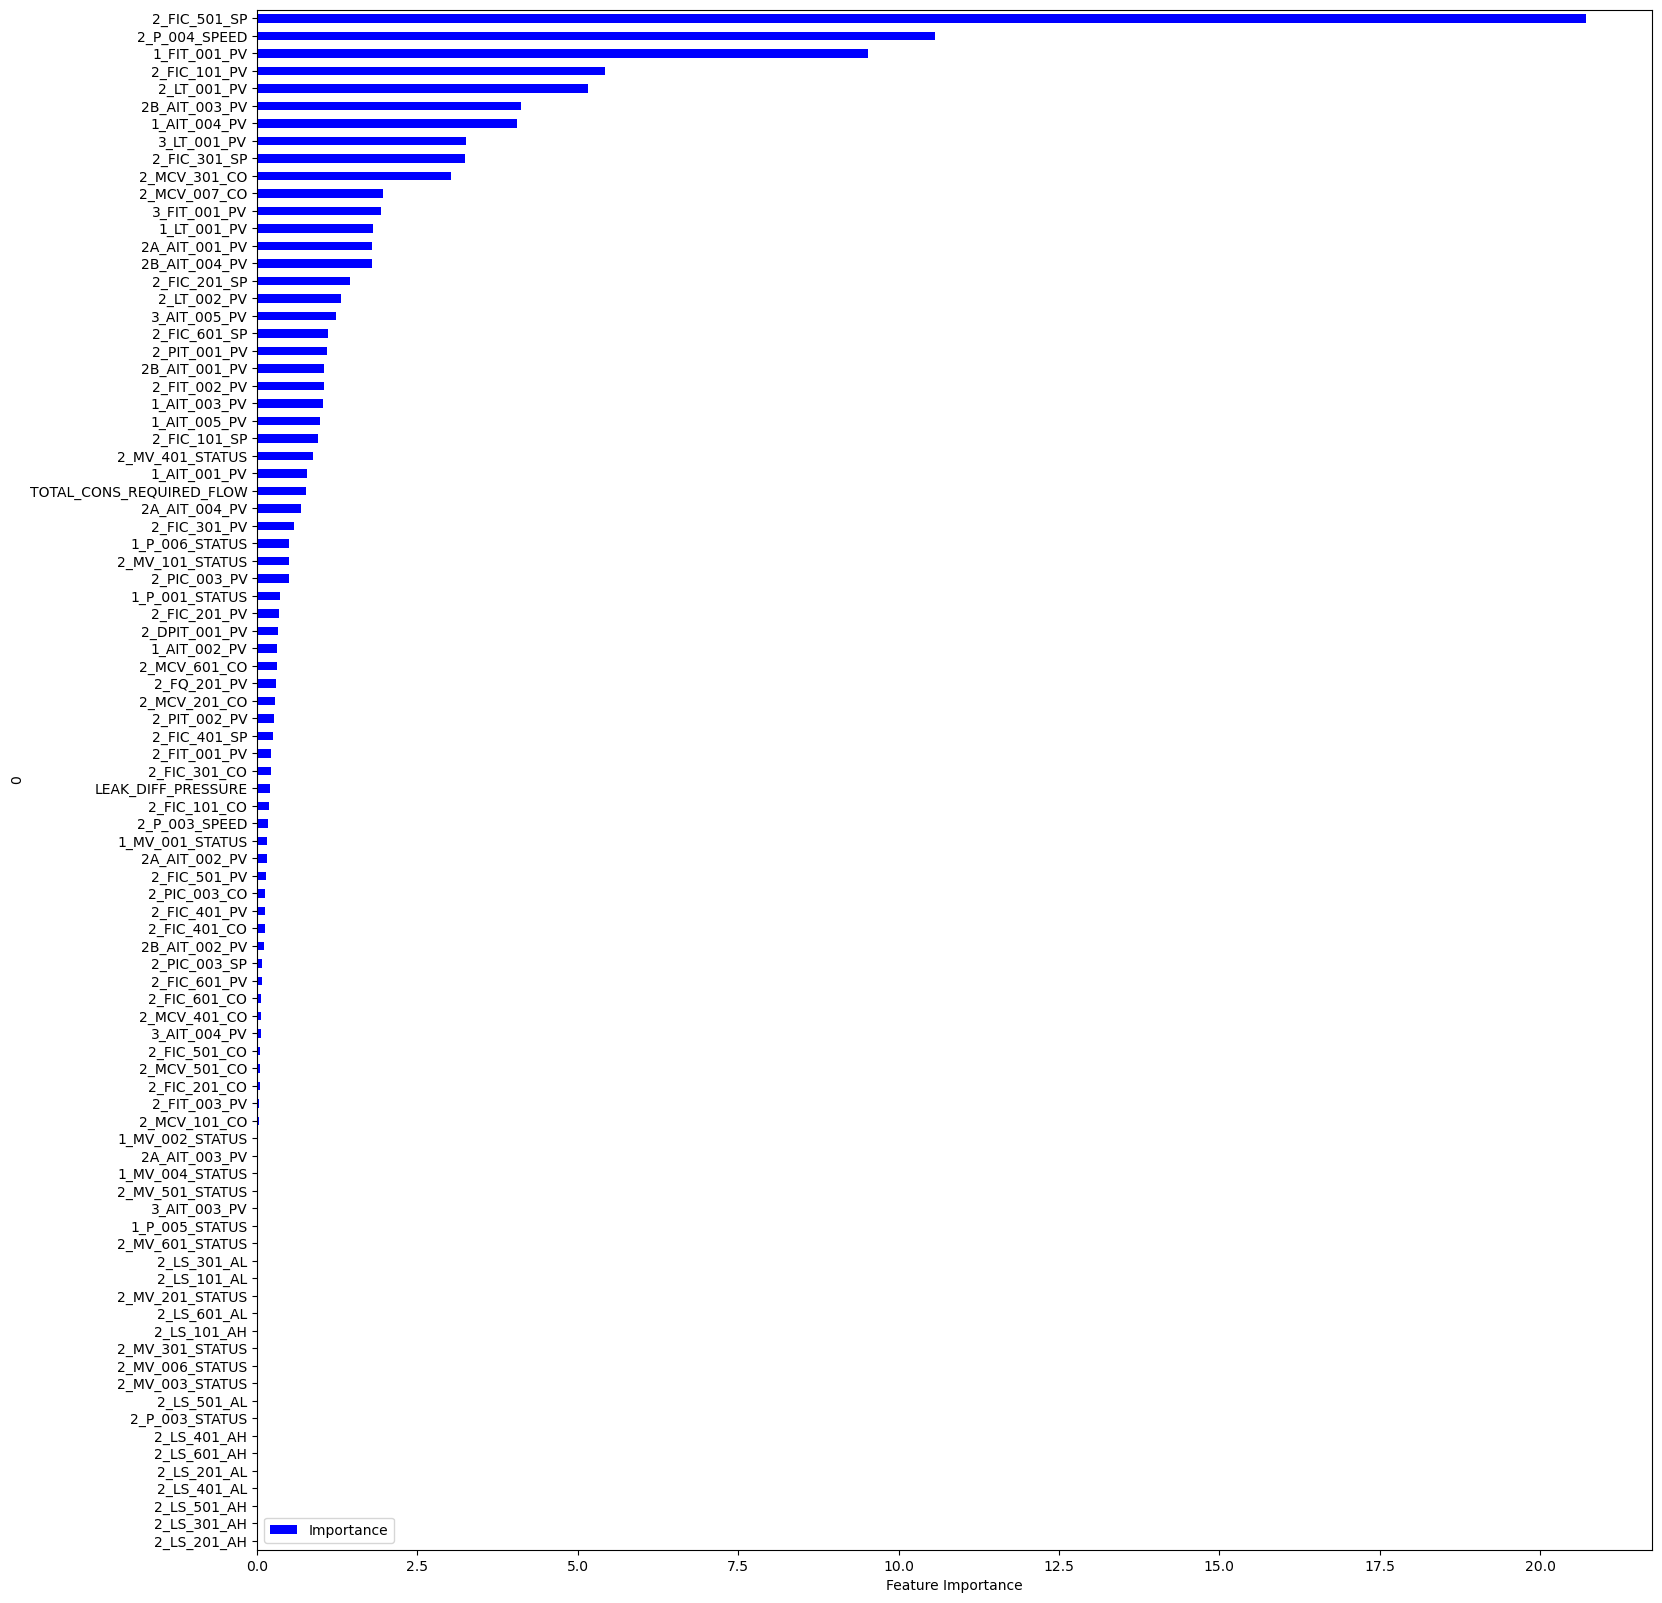

In [103]:
Importance.sort_values(by = "Importance",
                      axis = 0,
                      ascending=True).plot(kind = "barh", color = "b", figsize = (18,20))
plt.xlabel("Feature Importance")

In [105]:
# Create the DataFrame of feature importances
importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance (%)": rf_tuned.feature_importances_ * 100
})

# Sort by importance descending
importance = importance.sort_values(by="Importance (%)", ascending=False)

# Convert to dictionary
feature_importance_dict = dict(zip(importance["Feature"], importance["Importance (%)"]))

# Display top features
print("Top Features and Their Importance Scores:")
for feature, score in list(feature_importance_dict.items())[:20]:  # Top 10
    print(f"{feature}: {score:.2f}%")


Top Features and Their Importance Scores:
2_FIC_501_SP: 20.71%
2_P_004_SPEED: 10.57%
1_FIT_001_PV: 9.53%
2_FIC_101_PV: 5.42%
2_LT_001_PV: 5.17%
2B_AIT_003_PV: 4.12%
1_AIT_004_PV: 4.05%
3_LT_001_PV: 3.25%
2_FIC_301_SP: 3.24%
2_MCV_301_CO: 3.02%
2_MCV_007_CO: 1.96%
3_FIT_001_PV: 1.93%
1_LT_001_PV: 1.80%
2A_AIT_001_PV: 1.79%
2B_AIT_004_PV: 1.79%
2_FIC_201_SP: 1.46%
2_LT_002_PV: 1.31%
3_AIT_005_PV: 1.23%
2_FIC_601_SP: 1.11%
2_PIT_001_PV: 1.09%


In [107]:
# Selecting the top 15 important features

top_20_features = Importance.sort_values(by="Importance", ascending=False).head(20).index.tolist()
w_reduced = w[top_20_features] 

w_reduced.head()

,2_FIC_501_SP,2_P_004_SPEED,1_FIT_001_PV,2_FIC_101_PV,2_LT_001_PV,2B_AIT_003_PV,1_AIT_004_PV,3_LT_001_PV,2_FIC_301_SP,2_MCV_301_CO,2_MCV_007_CO,3_FIT_001_PV,1_LT_001_PV,2A_AIT_001_PV,2B_AIT_004_PV,2_FIC_201_SP,2_LT_002_PV,3_AIT_005_PV,2_FIC_601_SP,2_PIT_001_PV
0,0.11,0.03,0.00,0.24,69.86,8.69,482.48,64.33,0.10,20.07,0.00,0.63,48.48,0.17,475.49,0.10,78.59,0.76,0.15,152.44
1,0.11,0.03,0.00,0.24,69.86,8.73,482.48,64.33,0.10,20.07,0.00,0.63,48.48,0.17,475.39,0.10,78.59,0.76,0.15,152.44
2,0.11,0.03,0.00,0.24,69.87,8.73,482.47,64.39,0.10,19.52,0.00,0.62,48.40,0.17,475.39,0.10,78.90,0.76,0.15,152.37
3,0.11,0.03,0.00,0.24,69.87,8.73,482.48,64.43,0.10,18.83,0.00,0.63,48.49,0.17,475.39,0.10,78.98,0.76,0.15,152.37
4,0.11,0.03,0.00,0.24,69.87,8.73,482.48,64.43,0.10,18.83,0.00,0.63,48.49,0.17,475.48,0.10,78.98,0.76,0.15,152.37


## Global Shap

In [110]:
import shap
shap.initjs()

In [112]:
# Selecting 100 random samples from the test set

num_samples = 100
X_sample = X_test.sample(n=num_samples, random_state=42)

In [114]:
# Initializing the SHAP explainer

explainer = shap.Explainer(rf_tuned, X_train)

In [116]:
# Computing SHAP values for the selected samples

shap_values = explainer(X_sample)

In [118]:
print(np.shape(shap_values))

(100, 88, 2)


<Figure size 640x480 with 0 Axes>

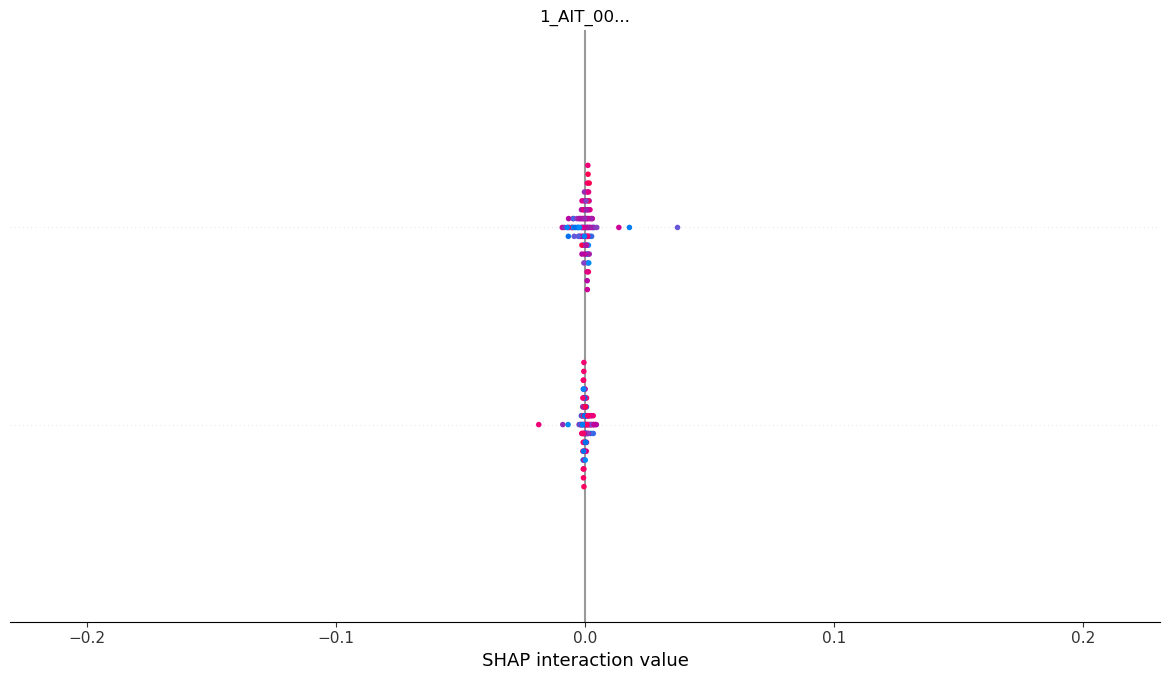

In [120]:
# Visualize the summary plot

shap.summary_plot(shap_values, X_sample)

 99%|===================| 18029/18196 [01:03<00:00]        

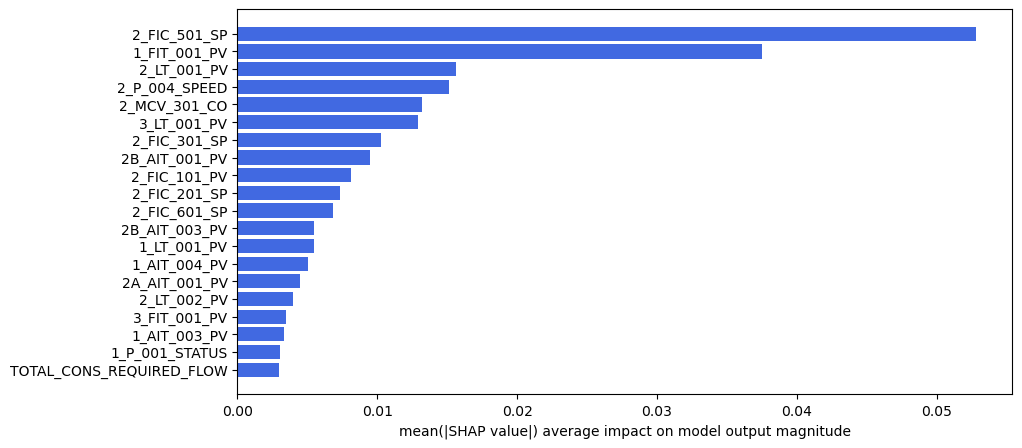

In [122]:
# Initializing the SHAP explainer

import shap
shap.initjs()


# Initialize SHAP explainer
explainer = shap.Explainer(rf_tuned, X_train)

# Compute SHAP values for test set
shap_values = explainer(X_test, check_additivity=False)

# Compute mean absolute SHAP values across all classes
shap_importance = np.abs(shap_values.values).mean(axis=(0, 2))  # Mean across samples & classes

# ✅ Use actual feature names from X_test (ensuring correct length)
feature_names = X_test.columns.tolist()  # Ensure the feature names match SHAP values

# Create DataFrame for feature importance
shap_importance_df = pd.DataFrame({'Feature': feature_names, 'SHAP Importance': shap_importance})

# Sort features by SHAP importance and select the top 20
shap_importance_df = shap_importance_df.sort_values(by='SHAP Importance', ascending=False).head(20)

# Plot top SHAP feature importance
plt.figure(figsize=(10, 5))
plt.barh(shap_importance_df['Feature'], shap_importance_df['SHAP Importance'], color='royalblue')
plt.xlabel("mean(|SHAP value|) average impact on model output magnitude")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


In [267]:
# Selecting 100 random samples from the test set

num_samples = 100
X_sample = X_test.sample(n=num_samples, random_state=42)

In [269]:
# Initializing the SHAP explainer

explainer = shap.Explainer(rf_tuned, X_train)

In [271]:
# Computing SHAP values for the selected samples

shap_values = explainer(X_sample)

In [273]:
print(np.shape(shap_values))

(100, 88, 2)


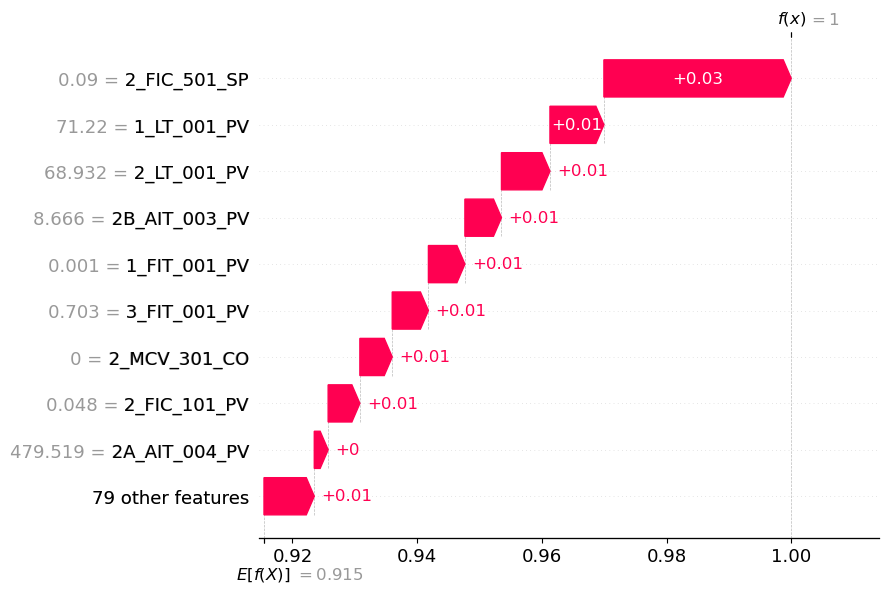

In [275]:
# Visualize the summary plot

shap.plots.waterfall(shap_values[0, :, 0 ])

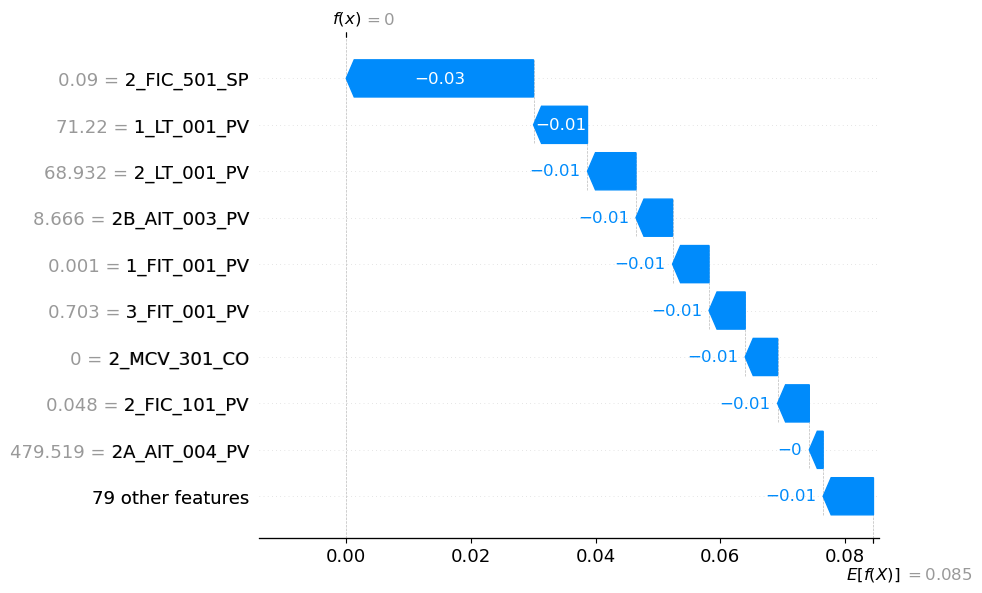

In [277]:
shap.plots.waterfall(shap_values[0, :, 1 ])

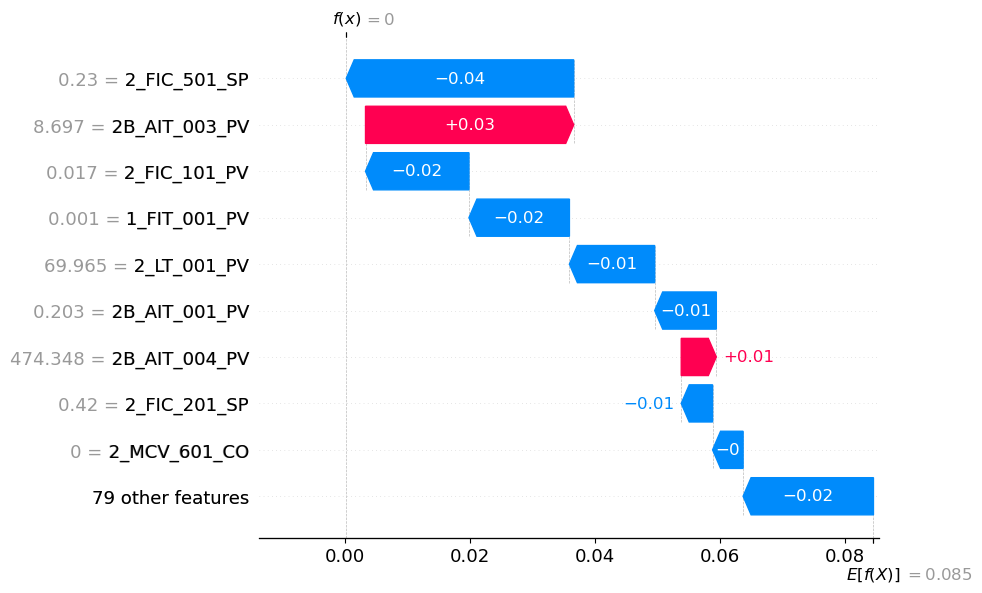

In [261]:
import shap

# Initialize SHAP explainer (use background data)
explainer = shap.Explainer(rf_loaded, X_train)

# Compute SHAP values for the specific sample
shap_values = explainer(sample)

# Plot local explanation (waterfall plot)
shap.plots.waterfall(shap_values[0, :, 1])  # 1 corresponds to the positive class (Attack)
